# Plotting uncertainty
In this example we will go over plotting uncertainties in various ways:
+ y errorbars
+ x errorbars
+ x and y errorbars (no covariance)
+ x and y error-ellipse (covariance)

## Packages being used
+ `matplotlib`: all the plotting
+ `pandas`: read in the data table
+ `numpy` and `scipy`: convert cov matrix to ellipse params

## Relevant documentation
+ `matplotlib`: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.errorbar.html

In [1]:
import pandas
import scipy.linalg as sl
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.patches import Ellipse
import mpl_style
%matplotlib inline
plt.style.use(mpl_style.style1)

Our data contains $(x, y)$ positions with 1-$\sigma$ uncertainties and covariance values:

In [2]:
t = pandas.read_csv('data.csv')
display(t)

,ID,x,y,sy,sx,pxy
0,1,201,592,61,9,-0.84
1,2,244,401,25,4,0.31
2,3,47,583,38,11,0.64
3,4,287,402,15,7,-0.27
4,5,203,495,21,5,-0.33
5,6,58,173,15,9,0.67
6,7,202,479,27,4,-0.02
7,8,202,504,14,4,-0.05
8,9,198,510,30,11,-0.84
9,10,158,416,16,7,-0.69


**Note** the full covariance matrix for each data point is: 
$\left[ \begin{array}{ccc} \sigma_x^2 & \rho_{xy}\sigma_x \sigma_y \\ \rho_{xy}\sigma_x \sigma_y & \sigma_y^2 \end{array} \right]$

## y-uncertainties or x-uncertainties only
The most common type of data you will work with will only have (significant) uncertainties in one direction.  In this case it is very easy to plot using `errorbar`:

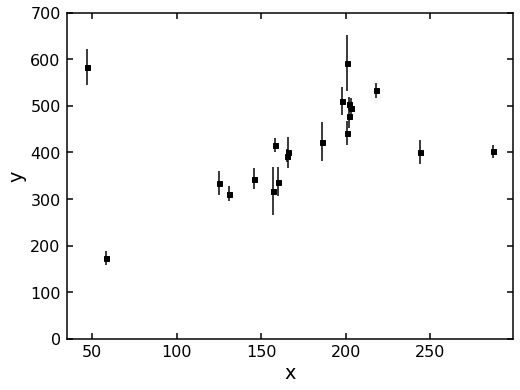

In [3]:
plt.figure(1)
plt.errorbar(
    t.x,
    t.y,
    yerr=t.sy,
    ls='None',
    mfc='k',
    mec='k',
    ms=5,
    marker='s',
    ecolor='k'
)
plt.xlabel('x')
plt.ylabel('y')
plt.ylim(0, 700);

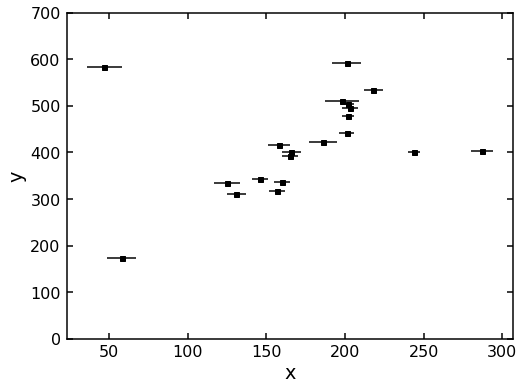

In [4]:
plt.figure(2)
plt.errorbar(
    t.x,
    t.y,
    xerr=t.sx,
    ls='None',
    mfc='k',
    mec='k',
    ms=5,
    marker='s',
    ecolor='k'
)
plt.xlabel('x')
plt.ylabel('y')
plt.ylim(0, 700);

## Uncertainties in both x and y with no cov
If your data has no cov you can still use `errorbar`:

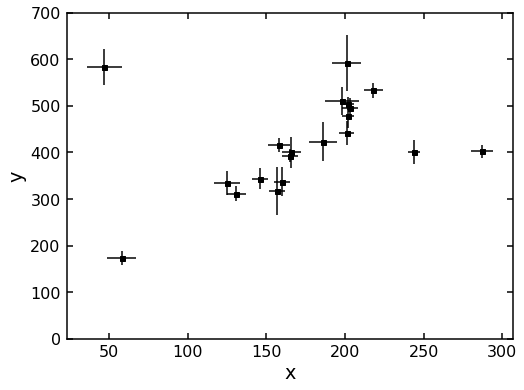

In [5]:
plt.figure(3)
plt.errorbar(
    t.x,
    t.y,
    yerr=t.sy,
    xerr=t.sx,
    ls='None',
    mfc='k',
    mec='k',
    ms=5,
    marker='s',
    ecolor='k'
)
plt.xlabel('x')
plt.ylabel('y')
plt.ylim(0, 700);

## Uncertainties in both x and y with cov
If your data does have cov you should plot a 1-$\sigma$ ellipse around each point.  There is no built in function to do this, so we will have to write our own.  We will start by writing a function to turn a cov matrix into the parameters for an ellipse and draw it on a figure.

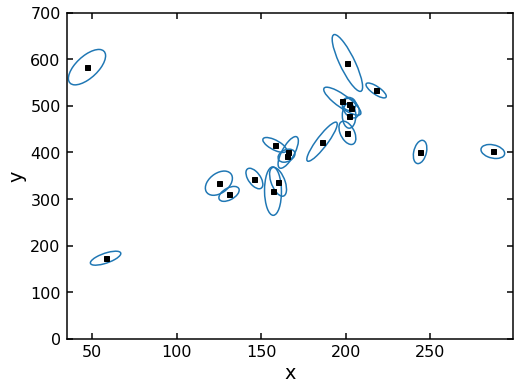

In [6]:
def cov_to_ellipse(cov, pos, **kwargs):
    eigvec,eigval,V = sl.svd(cov,full_matrices=False)
    # the angle the first eigenvector makes with the x-axis
    theta = np.degrees(np.arctan2(eigvec[1, 0], eigvec[0, 0]))
    # full width and height of ellipse, not radius
    # the eigenvalues are the variance along the eigenvectors
    width, height = 2 * np.sqrt(eigval)
    return Ellipse(xy=pos, width=width, height=height, angle=theta, **kwargs)

def plot_ellipse(t, ax=None, **kwargs):
    if ax is None:
        ax = plt.gca()
    for rdx, row in t.iterrows():
        cov = np.array(
            [[row.sx**2, row.pxy * row.sx * row.sy],
             [row.pxy * row.sx * row.sy, row.sy**2]]
        )
        ellip = cov_to_ellipse(cov, [row.x, row.y], **kwargs)
        ax.add_artist(ellip)
        
plt.figure(4)
plt.plot(
    t['x'],
    t['y'],
    's',
    mfc='k',
    mec='k',
    ms=5
)
plot_ellipse(
    t,
    lw=1.5,
    fc='none',
    ec='C0'
)
plt.xlabel('x')
plt.ylabel('y')
plt.ylim(0, 700)
plt.draw();